In [1]:
import json
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def collected(jsonFile):

    entries = json.load(open(jsonFile))["data"]
    r = [ {
        "dataDate": t['date'],
        "cases": t['cases'],
        "deaths": t['deaths'],
        "tests": t['tests']
        } for t in entries]
    r.sort( key=lambda x:x['dataDate'])

    windows = [
        {'date': r[i]['dataDate'],
         'cases': max(r[i]['cases']-r[i-7]['cases'],0),
         'tests': max(r[i]['tests']-r[i-7]['tests'],0),
         'deaths': r[i]['deaths']
         }
        for i in range(7,len(r))
        ]

    windows = [{
        'date' : w['date'],
        'cases' : w['cases'],
        'tests' : w['tests'],
        'deaths' : w['deaths'],
        'pos' : w['cases']/w['tests'] if (w['tests']) else 0
        }
        for w in windows
        ]
    windows = [
        {
            'date' : w['date'],
            'pos': w['pos'],
            'deaths' : w['deaths'],
            'estimate' : 28*w['cases']*math.sqrt(max(w['pos'],0.0))     
        }
        for w in windows
        ]
    windows = [
        {
        'date': w['date'],
        'pos': w['pos'],
            'deaths' : w['deaths'],
        'estimate': w['estimate']
        }
        for w in windows
        ]
    return windows


In [2]:
data=collected('../downloads/2020_8_21/lea.json')

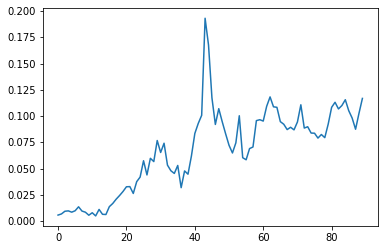

In [3]:

plt.plot([w['pos'] for w in data])

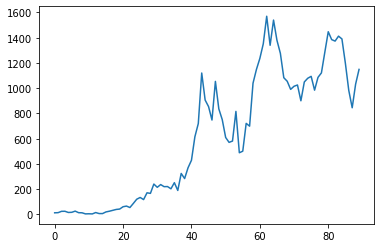

In [5]:
plt.plot([w['estimate'] for w in data])